In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
warnings.filterwarnings('ignore')
%matplotlib inline

In [63]:
glass_df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv")
glass_df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [64]:
glass_df.shape

(213, 11)

In [65]:
glass_df2 = glass_df.rename(columns = {'1.52101':'RI', '13.64':'Na', '4.49':'Mg', '1.10':'Al', '71.78':'Si',
       '0.06':'K', '8.75':'Ca', '0.00':'Ba','0.00.1':'Fe', '1.1':'Type'}, inplace = False)

In [66]:
glass_df2.head()

,1,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [67]:
glass_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       213 non-null    int64  
 1   RI      213 non-null    float64
 2   Na      213 non-null    float64
 3   Mg      213 non-null    float64
 4   Al      213 non-null    float64
 5   Si      213 non-null    float64
 6   K       213 non-null    float64
 7   Ca      213 non-null    float64
 8   Ba      213 non-null    float64
 9   Fe      213 non-null    float64
 10  Type    213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


In [68]:
glass_df2.describe() 

,1,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,108.000000,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,61.631972,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,2.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,55.000000,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,108.000000,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,161.000000,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [70]:
glass_df2.groupby('Type', as_index=False).mean()

,Type,1,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1,36.0,1.518685,13.236522,3.538841,1.164783,72.631304,0.453043,8.797971,0.012899,0.057826
1,2,108.5,1.518619,13.111711,3.002105,1.408158,72.598026,0.521053,9.073684,0.050263,0.079737
2,3,155.0,1.517964,13.437059,3.543529,1.201176,72.404706,0.406471,8.782941,0.008824,0.057059
3,5,170.0,1.518928,12.827692,0.773846,2.033846,72.366154,1.470000,10.123846,0.187692,0.060769
4,6,181.0,1.517456,14.646667,1.305556,1.366667,73.206667,0.000000,9.356667,0.000000,0.000000
5,7,200.0,1.517116,14.442069,0.538276,2.122759,72.965862,0.325172,8.491379,1.040000,0.013448


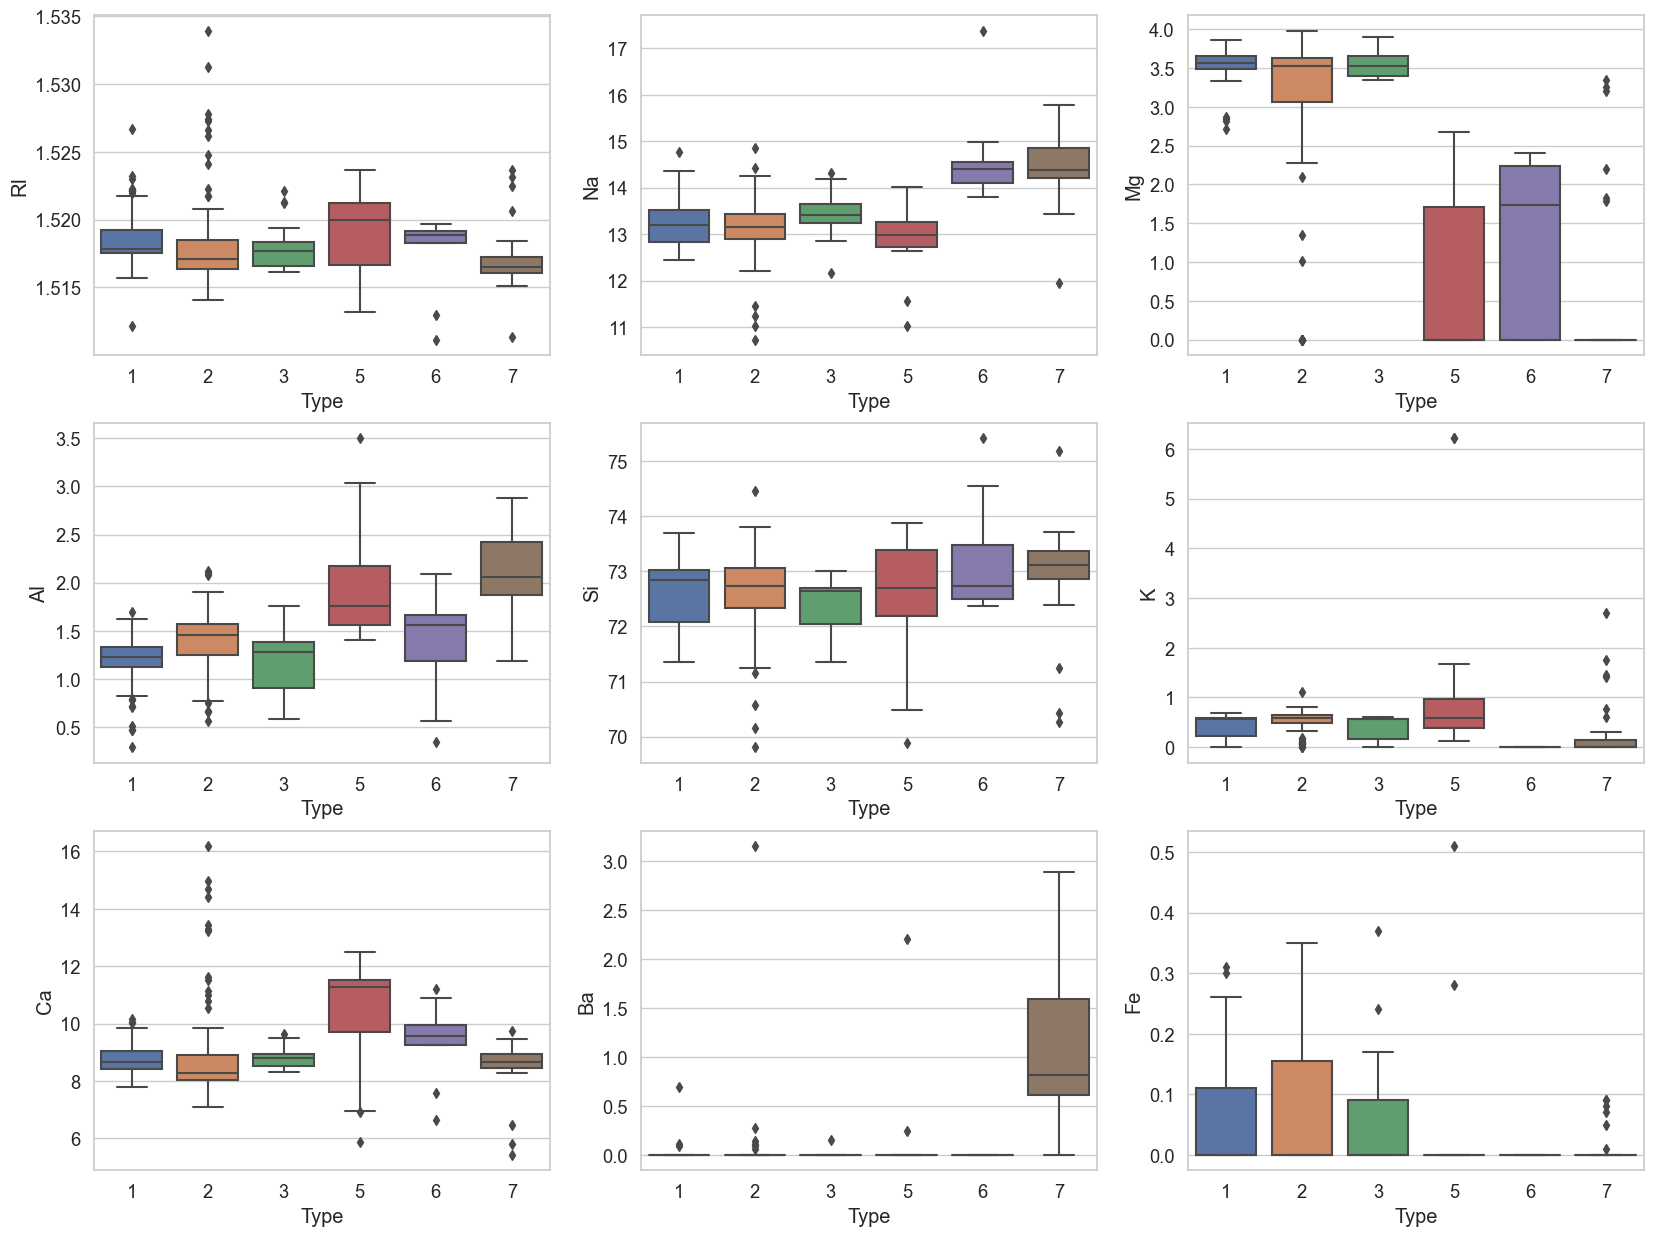

In [71]:
sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize = (20,15))
plt.subplot(3,3,1)
sns.boxplot(x='Type', y='RI', data=glass_df2)
plt.subplot(3,3,2)
sns.boxplot(x='Type', y='Na', data=glass_df2)
plt.subplot(3,3,3)
sns.boxplot(x='Type', y='Mg', data=glass_df2)
plt.subplot(3,3,4)
sns.boxplot(x='Type', y='Al', data=glass_df2)
plt.subplot(3,3,5)
sns.boxplot(x='Type', y='Si', data=glass_df2)
plt.subplot(3,3,6)
sns.boxplot(x='Type', y='K', data=glass_df2)
plt.subplot(3,3,7)
sns.boxplot(x='Type', y='Ca', data=glass_df2)
plt.subplot(3,3,8)
sns.boxplot(x='Type', y='Ba', data=glass_df2)
plt.subplot(3,3,9)
sns.boxplot(x='Type', y='Fe', data=glass_df2)
plt.show()

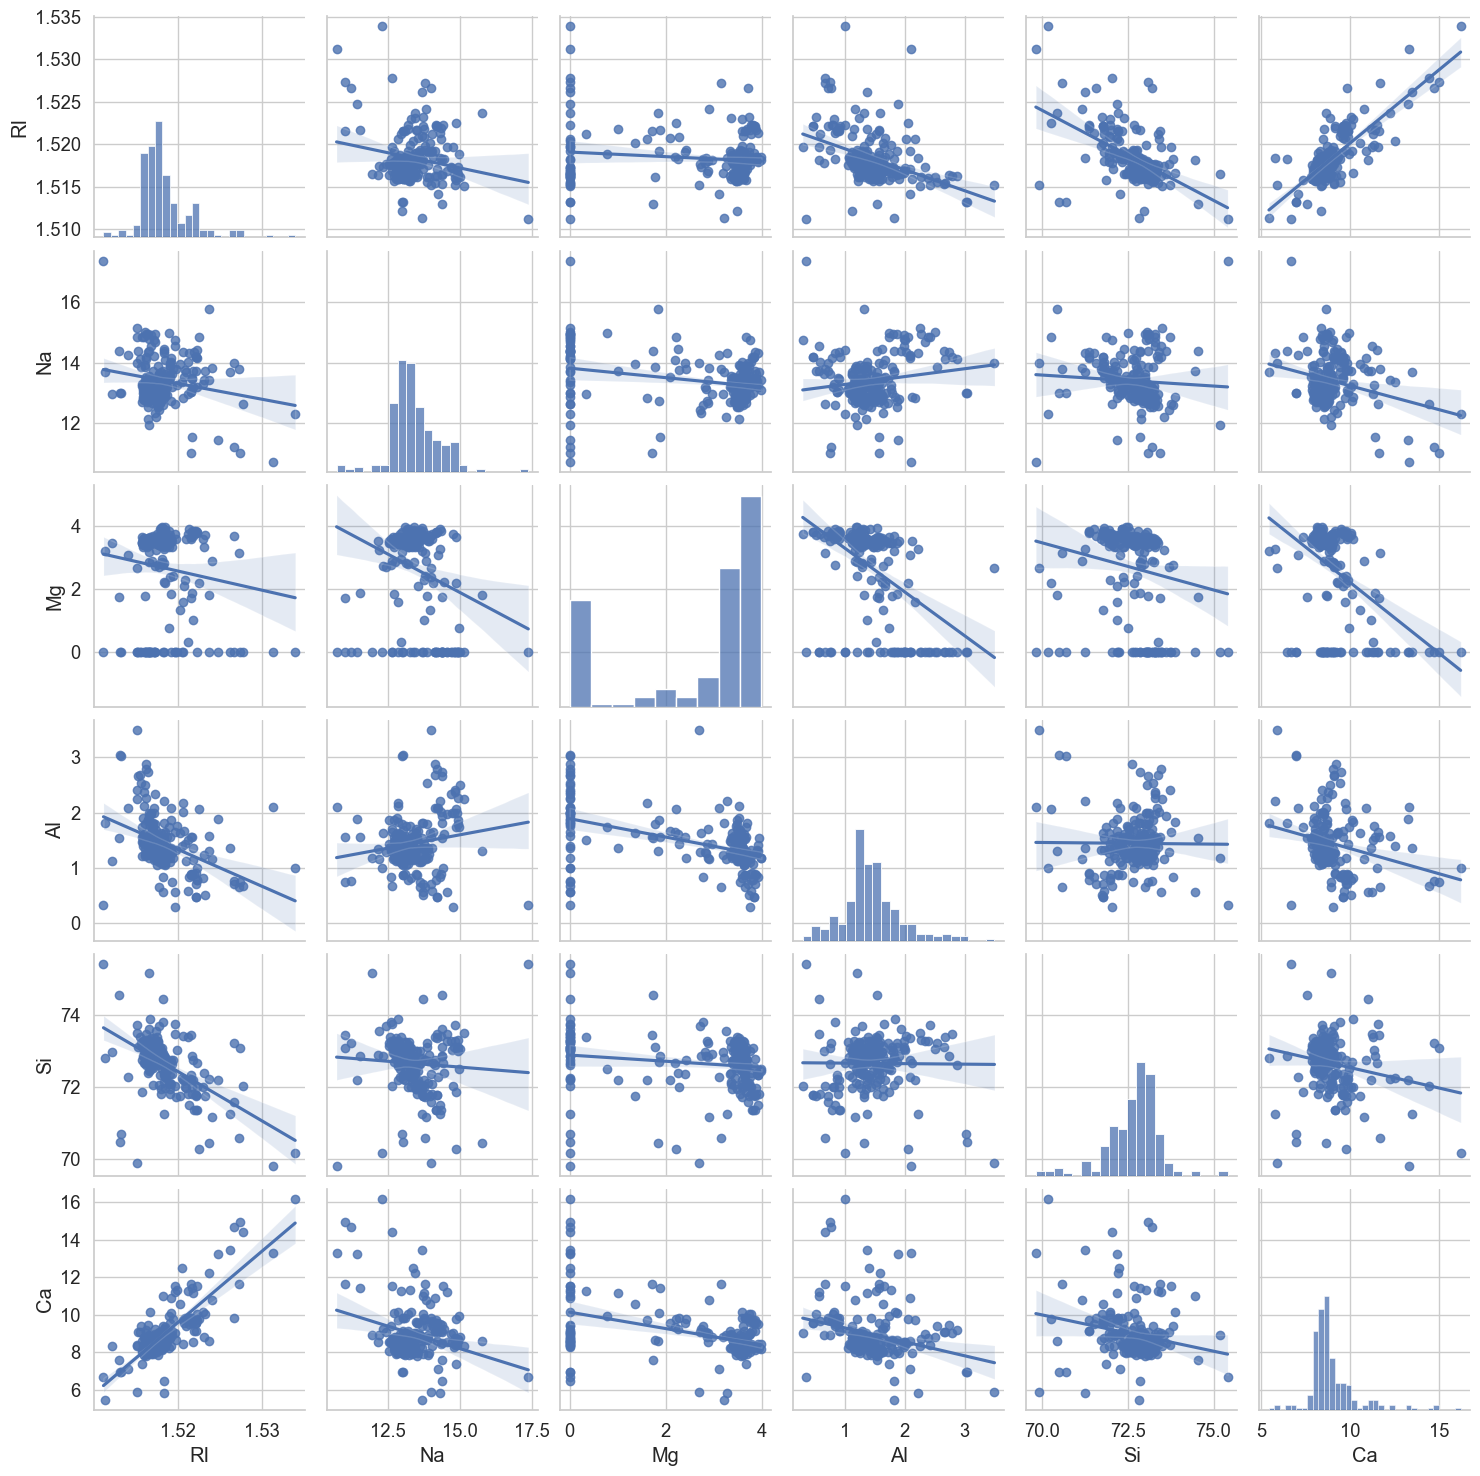

In [72]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
sns.pairplot(glass_df2[['RI','Na','Mg','Al','Si','Ca']], kind='reg')

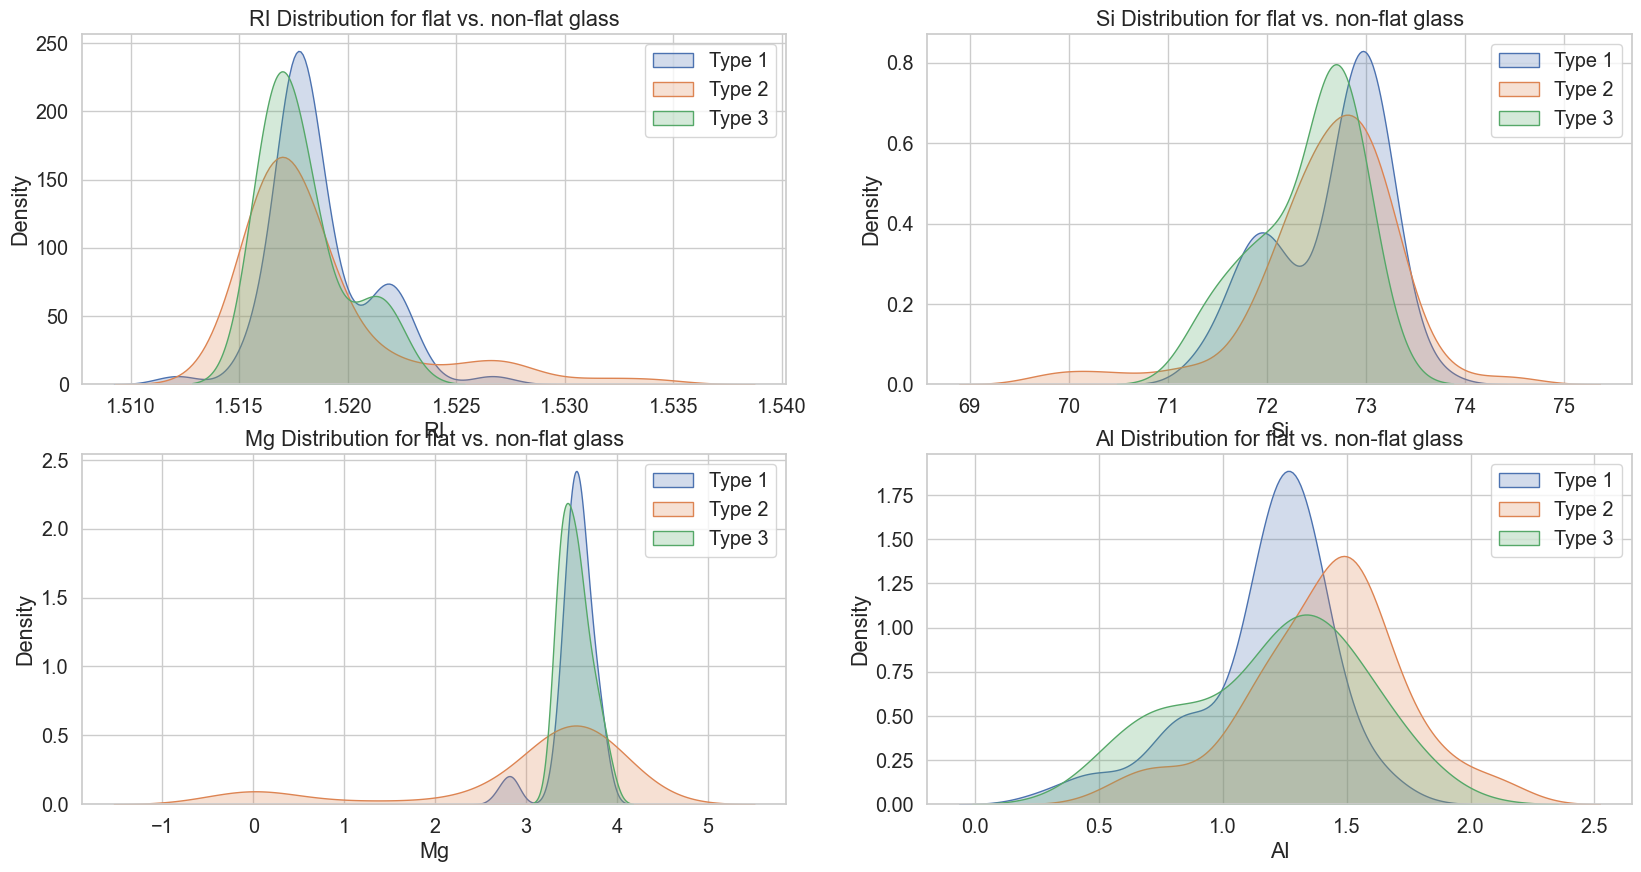

In [73]:
sns.set(style="whitegrid", font_scale=1.3)
plt.subplots(figsize = (20,10))
plt.subplot(2,2,1)
sns.kdeplot(glass_df2["RI"][glass_df2.Type == 1], shade = True)
sns.kdeplot(glass_df2["RI"][glass_df2.Type == 2], shade = True)
sns.kdeplot(glass_df2["RI"][glass_df2.Type == 3], shade = True)
plt.title("RI Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])
plt.subplot(2,2,2)
sns.kdeplot(glass_df2["Si"][glass_df2.Type == 1], shade = True)
sns.kdeplot(glass_df2["Si"][glass_df2.Type == 2], shade = True)
sns.kdeplot(glass_df2["Si"][glass_df2.Type == 3], shade = True)
plt.title("Si Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])
plt.subplot(2,2,3)
sns.kdeplot(glass_df2["Mg"][glass_df2.Type == 1], shade = True)
sns.kdeplot(glass_df2["Mg"][glass_df2.Type == 2], shade = True)
sns.kdeplot(glass_df2["Mg"][glass_df2.Type == 3], shade = True)
plt.title("Mg Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])
plt.subplot(2,2,4)
sns.kdeplot(glass_df2["Al"][glass_df2.Type == 1], shade = True)
sns.kdeplot(glass_df2["Al"][glass_df2.Type == 2], shade = True)
sns.kdeplot(glass_df2["Al"][glass_df2.Type == 3], shade = True)
plt.title("Al Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])

<Axes: >

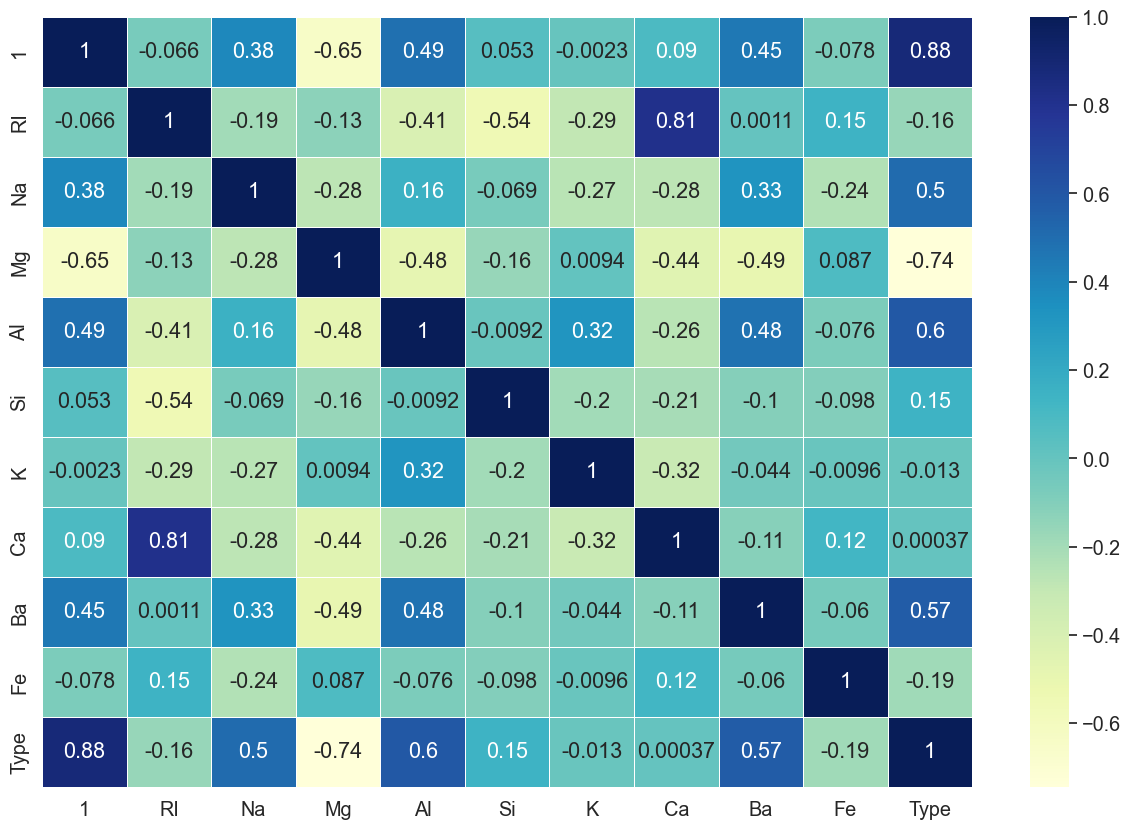

In [74]:
plt.subplots(figsize=(15,10))
sns.heatmap(glass_df2.corr(),cmap='YlGnBu',annot=True, linewidth=.5)

                      P1    P2    P3    P4    P5   P6    P7   P8   P9
Explained_Variance  3.01  1.66  0.68  0.65  0.21  0.1  0.01  0.0  0.0


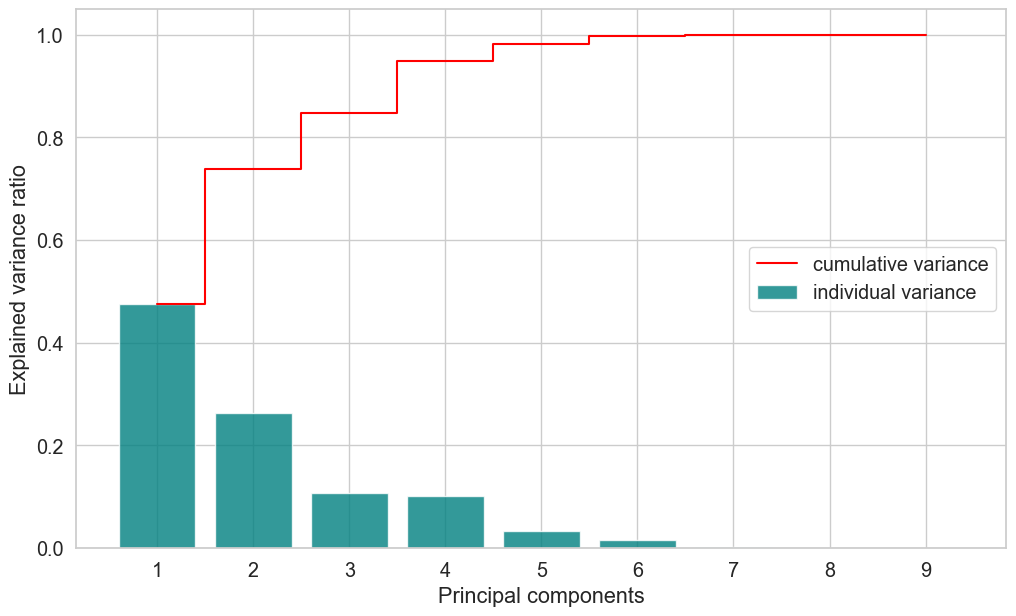

In [75]:
X_var = glass_df2[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]
pca = PCA(random_state = 1)
pca.fit(X_var)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
var_df = pd.DataFrame(pca.explained_variance_.round(2), index=["P" + str(i) for i in range(1,10)],
                      columns=["Explained_Variance"])
print(var_df.T)
plt.figure(figsize=(12,7))
plt.bar(range(1,len(cum_var_exp)+1), var_exp, align= 'center', label= 'individual variance', color='teal', alpha = 0.8)
plt.step(range(1,len(cum_var_exp)+1), cum_var_exp, where = 'mid' , label= 'cumulative variance', color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(np.arange(1,len(var_exp)+1,1))
plt.legend(loc='center right')
plt.show()

In [76]:
pca_red = PCA(n_components=5)
X_reduced = pca_red.fit_transform(X_var)

In [77]:
X = X_reduced
y = glass_df2["Type"].values

In [78]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)


print(np.unique(y_train))
print(np.unique(y_test))

[1 2 3 5 6 7]
[1 2 3 5 6 7]


In [79]:
svmMod = SVC()
svmMod.fit(X_train,y_train)
y_pred = svmMod.predict(X_test)
sc1 = metrics.accuracy_score(y_pred,y_test)


In [80]:

gbmMod = GradientBoostingClassifier(max_depth = 3, n_estimators = 100, learning_rate = 0.05, random_state = 1)
gbmMod.fit(X_train,y_train)
y_pred = gbmMod.predict(X_test)
sc3 = metrics.accuracy_score(y_pred,y_test)

DecTree = tree.DecisionTreeClassifier()
DecTree.fit(X_train, y_train)
y_pred = DecTree.predict(X_test)
sc4 = metrics.accuracy_score(y_pred,y_test)

RandFor = RandomForestClassifier(max_depth = 3, min_samples_split=2, n_estimators = 50, random_state = 1)
RandFor.fit(X_train, y_train)
y_pred = RandFor.predict(X_test)
sc5 = metrics.accuracy_score(y_pred,y_test)


In [81]:
print(DecTree.feature_importances_)
print(RandFor.feature_importances_)
print(gbmMod.feature_importances_)

[0.27897244 0.25274516 0.10472119 0.25934451 0.10421671]
[0.32540329 0.32420066 0.04144739 0.19049033 0.11845833]
[0.38239148 0.26243975 0.07869043 0.22146642 0.05501193]


In [82]:
pd.DataFrame([['Support Vector Machine',sc1],['Gradient Boost',sc3],
                             ['Decision Tree',sc4],['Random Forest',sc5]],
                                 columns=['Model','Accuracy'])

,Model,Accuracy
0,Support Vector Machine,0.687500
1,Gradient Boost,0.750000
2,Decision Tree,0.687500
3,Random Forest,0.765625


In [83]:
tuned_parameters = [{'kernel': ['rbf','linear'], 'gamma': [0.001, 0.01, 0.1, 10],
                     'C': [0.001, 0.01, 0.1, 1, 10]}]
grid = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(grid.best_params_)

Best parameters set found on development set:

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [84]:
model = grid.best_estimator_
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
metrics.accuracy_score(y_pred,y_test)

0.796875

Text(269.25, 0.5, 'predicted label')

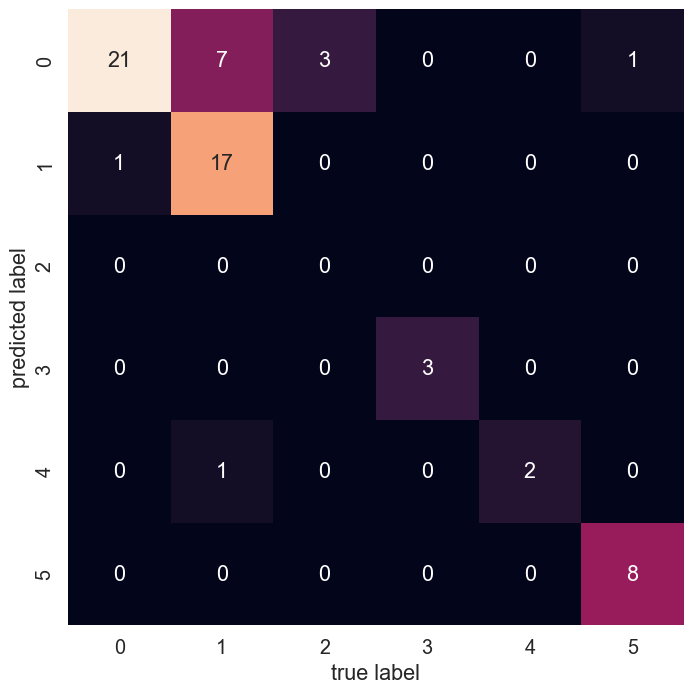

In [85]:
mat = confusion_matrix(y_test, y_pred)
plt.subplots(figsize=(12,8))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.66      0.95      0.78        22
           2       0.94      0.68      0.79        25
           3       0.00      0.00      0.00         3
           5       1.00      1.00      1.00         3
           6       0.67      1.00      0.80         2
           7       1.00      0.89      0.94         9

    accuracy                           0.80        64
   macro avg       0.71      0.75      0.72        64
weighted avg       0.80      0.80      0.78        64

